## Load data

In [2]:
import pandas as pd

# File paths
sales_file_path = "sales_2018-2023.xlsx"
charging_stations_file_path = "Charging Stations By State.xlsx"

# Load the Excel files
sales_data = pd.ExcelFile(sales_file_path)
charging_stations_data = pd.ExcelFile(charging_stations_file_path)

# Inspect sheet names
sales_data.sheet_names, charging_stations_data.sheet_names

(['3'], ['1'])

In [3]:
# Load data from the identified sheets
sales_df = sales_data.parse("3")
charging_stations_df = charging_stations_data.parse("1")

# Display first few rows of each dataset
sales_df.head(), charging_stations_df.head()


(        State  Electric (EV)  Plug-In Hybrid Electric (PHEV)  \
 0     Alabama           1300                            1500   
 1      Alaska            500                             300   
 2     Arizona          12600                            7700   
 3    Arkansas            600                             800   
 4  California         273500                          215000   
 
    Hybrid Electric (HEV)  Biodiesel  Ethanol/Flex (E85)  \
 0                  31800          0              509500   
 1                   5400          0               62000   
 2                 102000          0              533600   
 3                  20300          0              370600   
 4                1085300          0             1615200   
 
    Compressed Natural Gas (CNG)  Propane  Hydrogen  Methanol  Gasoline  \
 0                         17000        0         0         0   3733700   
 1                          3700        0         0         0    484900   
 2                   

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for sales data
sales_summary = sales_df.describe()

# Summary statistics for charging stations data
charging_summary = charging_stations_df.describe()

# Checking for missing values in both datasets
sales_missing = sales_df.isnull().sum()
charging_missing = charging_stations_df.isnull().sum()

# Displaying summary statistics and missing values analysis
sales_summary, charging_summary, sales_missing, charging_missing

(       Electric (EV)  Plug-In Hybrid Electric (PHEV)  Hybrid Electric (HEV)  \
 count   3.060000e+02                      306.000000           3.060000e+02   
 mean    3.211667e+04                    15355.228758           1.070095e+05   
 std     1.027138e+05                    43359.654762           1.937738e+05   
 min     1.000000e+02                      200.000000           3.700000e+03   
 25%     2.400000e+03                     2000.000000           2.232500e+04   
 50%     7.950000e+03                     5300.000000           5.560000e+04   
 75%     2.512500e+04                    12975.000000           1.235000e+05   
 max     1.256600e+06                   410700.000000           1.703200e+06   
 
            Biodiesel  Ethanol/Flex (E85)  Compressed Natural Gas (CNG)  \
 count     306.000000        3.060000e+02                    306.000000   
 mean    24587.581699        4.713023e+05                   5825.490196   
 std     50443.142243        4.798880e+05            

- Sales Data (2018-2023)
Covers 306 entries (representing multiple years per state).  
Average EV sales: ~32,117 per state/year.  
Max EV sales: 1.25 million in a single entry (likely California).  
No missing values.  
Other fuel types, including gasoline and diesel, are included for comparison.  
- Charging Station Data
Covers 54 states/territories.  
Average total EVs per state: 80,572.  
EV-to-charger ratio: Ranges from 4.18 to 41.34 EVs per charger.  
1 missing value in "Ratio: EVs to Charger Ports".  

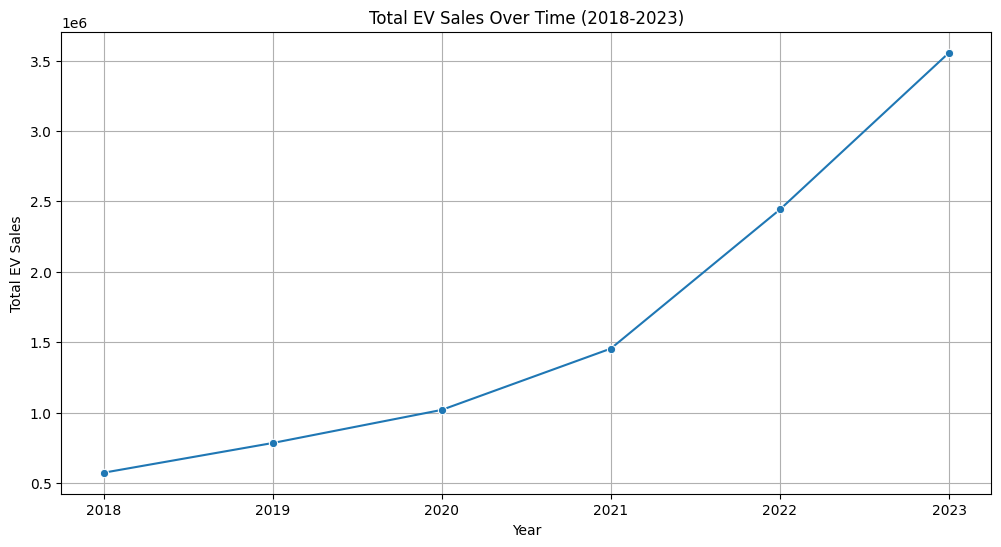

In [5]:
# EV Sales Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_df.groupby("Year")["Electric (EV)"].sum(), marker="o")
plt.title("Total EV Sales Over Time (2018-2023)")
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.grid(True)
plt.show()


C:\Users\zhang\AppData\Local\Temp\ipykernel_7964\1948230007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette="Blues_r")


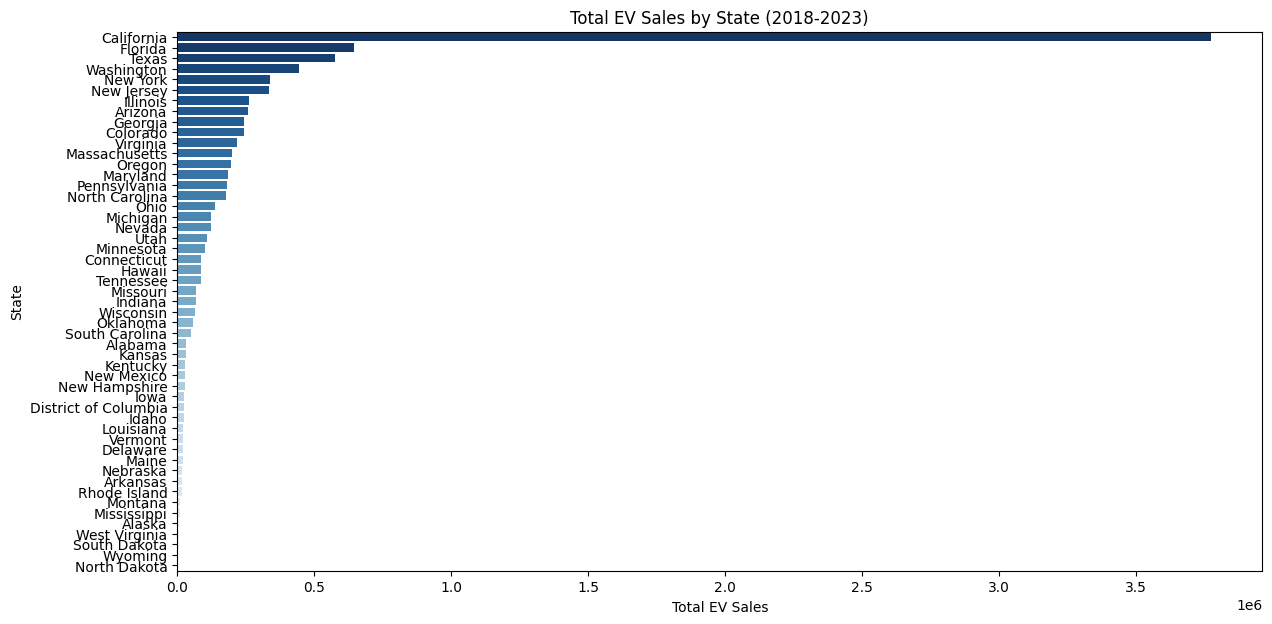

In [6]:
# EV Sales by State (Summed Across Years)
plt.figure(figsize=(14, 7))
sales_by_state = sales_df.groupby("State")["Electric (EV)"].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette="Blues_r")
plt.title("Total EV Sales by State (2018-2023)")
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.show()


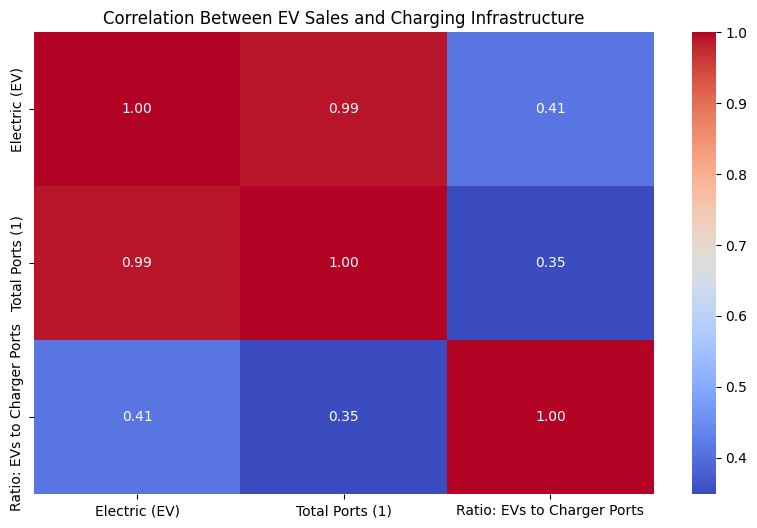

In [7]:
# Merge sales data and charging station data on "State"
sales_df_2023 = sales_df[sales_df["Year"] == 2023]
merged_df = sales_df_2023.groupby("State")[["Electric (EV)"]].sum().reset_index()
merged_df = merged_df.merge(charging_stations_df, on="State", how="inner")

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[["Electric (EV)", "Total Ports (1)", "Ratio: EVs to Charger Ports"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between EV Sales and Charging Infrastructure")
plt.show()


- Very high correlation (~0.99) between EV sales and total charging ports: This suggests that states with more EV sales also tend to have more chargers, but we can’t conclude causation.
- Moderate positive correlation (~0.40) between EV sales and EV-to-charger ratio: A higher EV-to-charger ratio (fewer chargers per EV) is actually linked with higher EV adoption, meaning states with higher adoption may be struggling with charger availability.

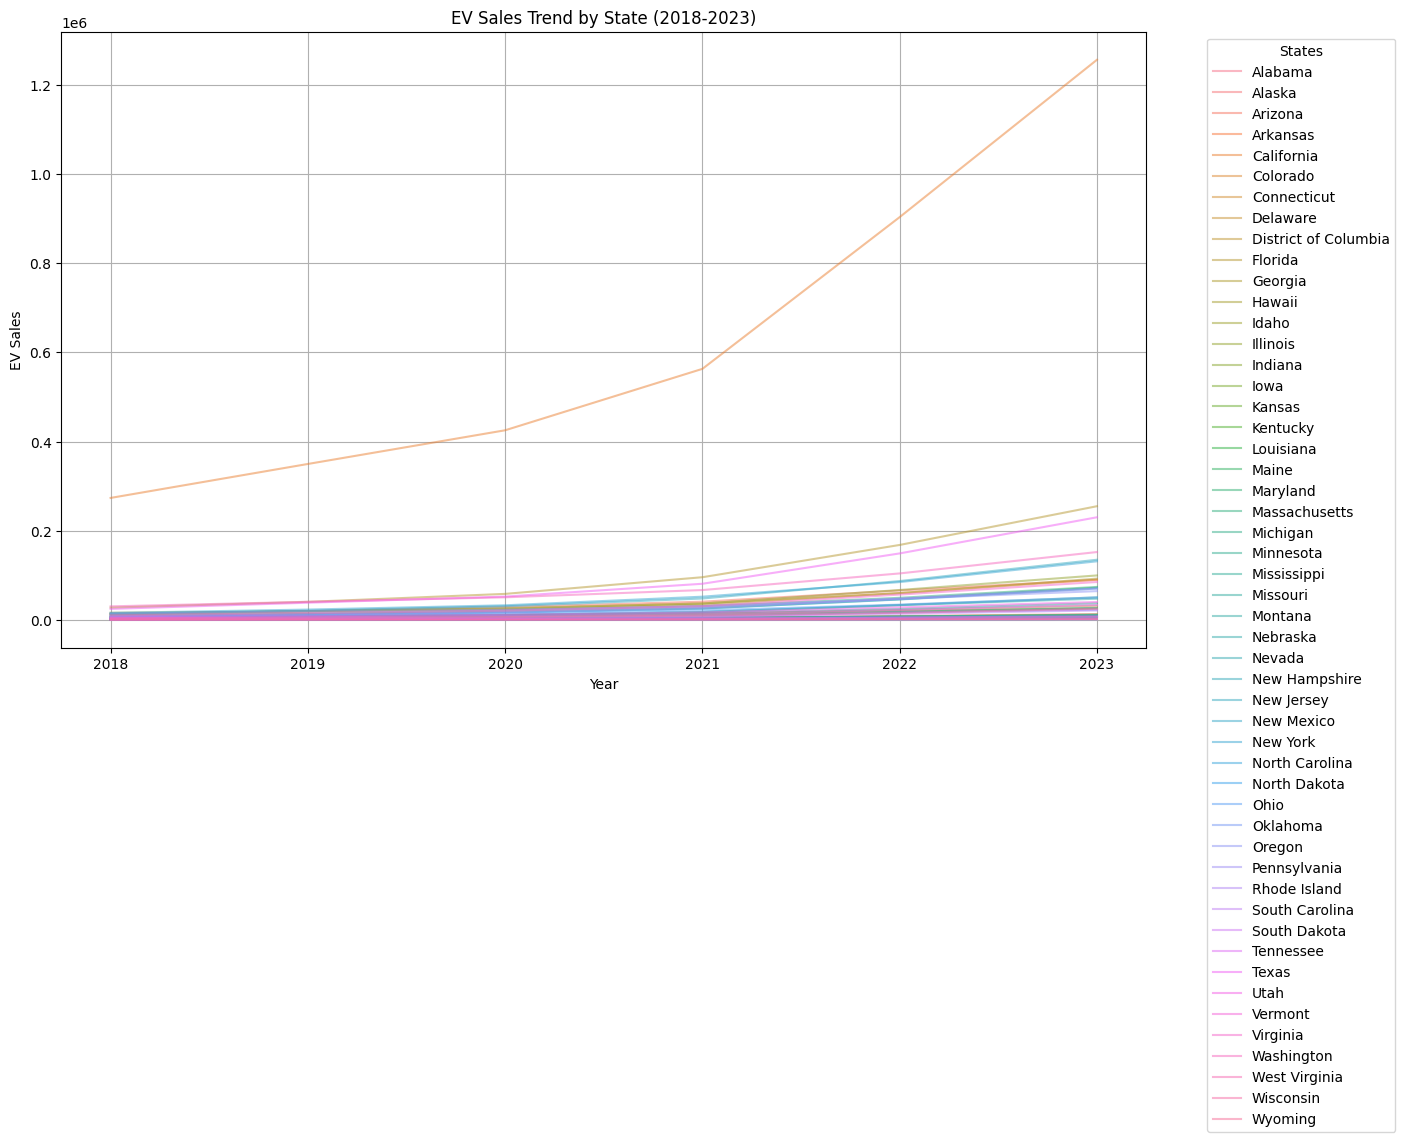

In [8]:
# Plot EV sales trend for all states over time 
plt.figure(figsize=(14, 8))
plot = sns.lineplot(data=sales_df, x="Year", y="Electric (EV)", hue="State", alpha=0.5)

# Customize legend with full state names and matching colors
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, labels, title="States", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("EV Sales Trend by State (2018-2023)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.grid(True)
plt.show()

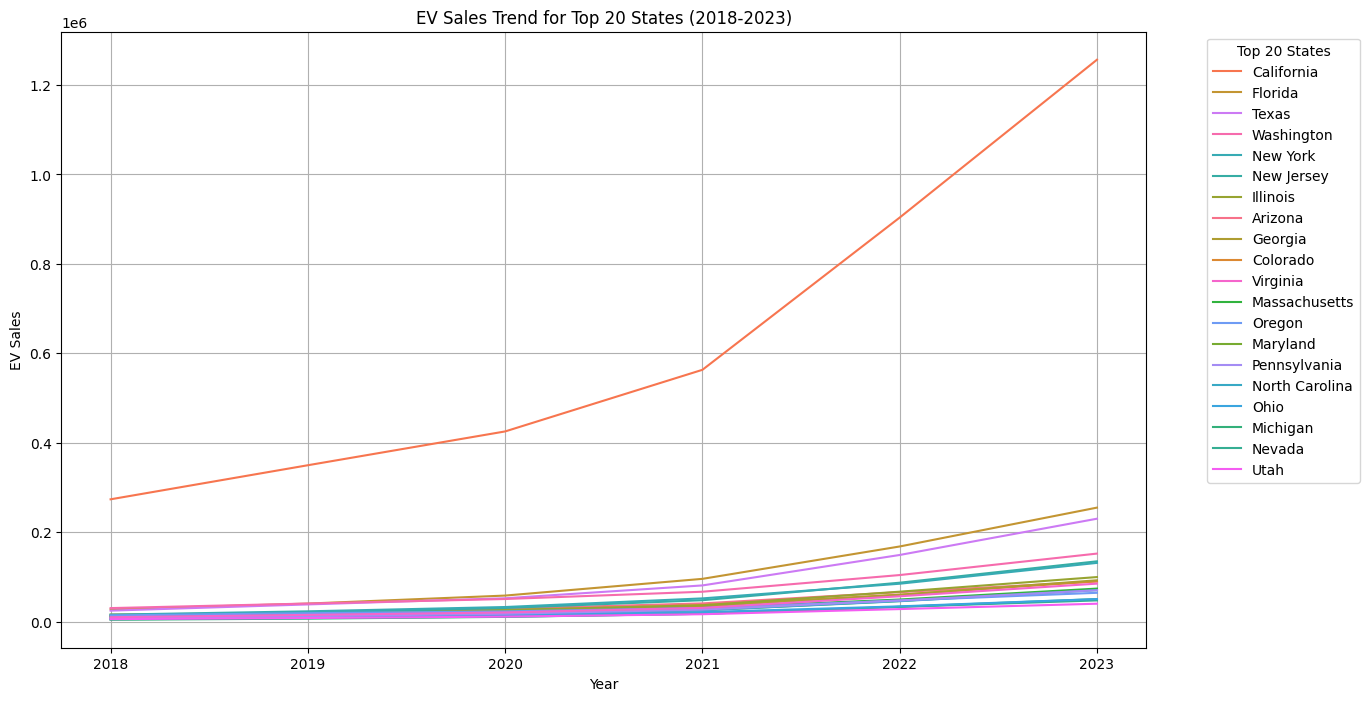

In [9]:
# Calculate the top 20 states by average EV sales and sort by average
top_20_states_avg = sales_df.groupby("State")["Electric (EV)"].mean().nlargest(20)
top_20_states = top_20_states_avg.index

# Filter sales_df to include only top 20 states
filtered_sales_df = sales_df[sales_df["State"].isin(top_20_states)]

# Plot EV sales trend for top 20 states over time 
plt.figure(figsize=(14, 8))
plot = sns.lineplot(data=filtered_sales_df, x="Year", y="Electric (EV)", hue="State", alpha=1)

# Customize legend to include only top 20 states and order by average EV sales
handles, labels = plot.get_legend_handles_labels()
state_order = top_20_states_avg.index.tolist()  # Order states by average EV sales
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: state_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)

plt.legend(handles, labels, title="Top 20 States", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("EV Sales Trend for Top 20 States (2018-2023)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.grid(True)
plt.show()


In [10]:
# Merging EV sales and charging ports data for comparison
sales_ports_df = merged_df[["State", "Electric (EV)", "Total Ports (1)"]].sort_values(by="Electric (EV)", ascending=False)

# Normalize total ports to match EV sales scale
max_ev_sales = sales_ports_df["Electric (EV)"].max()
max_total_ports = sales_ports_df["Total Ports (1)"].max()
scaling_factor = max_ev_sales / max_total_ports

sales_ports_df["Total Ports (Scaled)"] = sales_ports_df["Total Ports (1)"] * scaling_factor



In [11]:
sales_ports_df.head()

,State,Electric (EV),Total Ports (1),Total Ports (Scaled)
4,California,1256600,34185,1.256600e+06
9,Florida,254900,5644,2.074667e+05
43,Texas,230100,4946,1.818091e+05
47,Washington,152100,3765,1.383969e+05
30,New Jersey,134800,1610,5.918169e+04


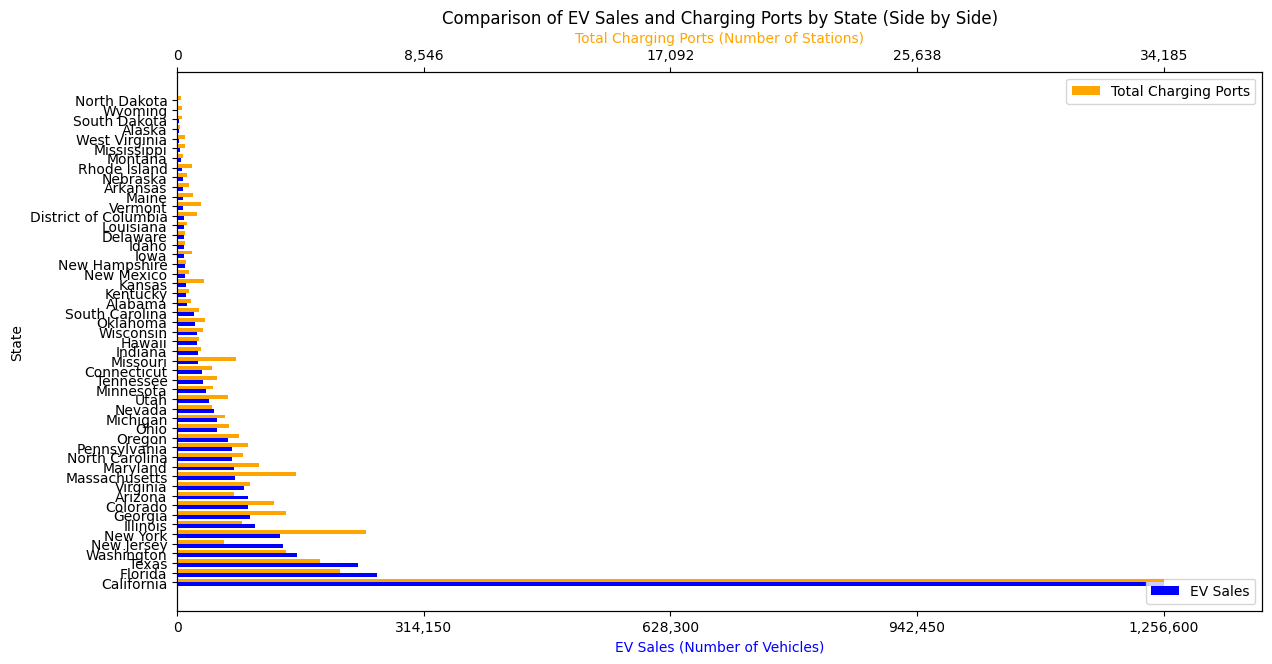

In [12]:
# Creating a side-by-side bar chart with correctly scaled and labeled x-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

width = 0.4  # Bar width
y_positions = range(len(sales_ports_df["State"]))  # Y positions for bars

# Plot EV Sales bars
ax1.barh([y - width/2 for y in y_positions], sales_ports_df["Electric (EV)"], height=width, label="EV Sales", color="blue")
ax1.set_xlabel("EV Sales (Number of Vehicles)", color="blue")

# Set correct x-axis limits and tick labels for EV Sales
ev_sales_max = sales_ports_df["Electric (EV)"].max()
ax1.set_xlim([0, ev_sales_max * 1.1])
ax1.set_xticks([0, ev_sales_max * 0.25, ev_sales_max * 0.5, ev_sales_max * 0.75, ev_sales_max])
ax1.set_xticklabels([f"{int(x):,}" for x in ax1.get_xticks()])  # Format numbers with commas

# Create second x-axis for Total Ports
ax2 = ax1.twiny()
ax2.barh([y + width/2 for y in y_positions], sales_ports_df["Total Ports (1)"], height=width, label="Total Charging Ports", color="orange")
ax2.set_xlabel("Total Charging Ports (Number of Stations)", color="orange")

# Set correct x-axis limits and tick labels for Total Ports
ports_max = sales_ports_df["Total Ports (1)"].max()
ax2.set_xlim([0, ports_max * 1.1])
ax2.set_xticks([0, ports_max * 0.25, ports_max * 0.5, ports_max * 0.75, ports_max])
ax2.set_xticklabels([f"{int(x):,}" for x in ax2.get_xticks()])  # Format numbers with commas

# Labels and title
ax1.set_yticks(y_positions)
ax1.set_yticklabels(sales_ports_df["State"])
ax1.set_ylabel("State")
ax1.set_title("Comparison of EV Sales and Charging Ports by State (Side by Side)")

# Legends
ax1.legend(loc="lower right")
ax2.legend(loc="upper right")

plt.show()


In [13]:
df = pd.read_csv('Data_viz/merged_data.csv')
df.head(6)

,STATE,Total_Population,Avg_AGI,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Year,Rural VMT,Urban VMT,Total VMT
0,Alaska,7788980.0,4.5,500,300,5400,0,62000,3700,0,0,0,484900,41000,16100,2018,2276.520690,3210.799304,5487.319994
1,Alaska,7788980.0,4.5,700,400,5800,0,64000,3200,0,0,0,473700,40100,14600,2019,2589.856103,3291.447025,5881.303128
2,Alaska,7788980.0,4.5,900,400,6200,0,64000,2700,0,0,0,460900,39600,11400,2020,2482.957440,2822.931110,5305.888550
3,Alaska,7788980.0,4.5,1300,500,7300,7600,50100,100,0,0,0,464200,31700,6300,2021,2682.072370,3070.115280,5752.187650
4,Alaska,7788980.0,4.5,2700,900,10600,9600,46800,0,0,0,0,454300,29800,5100,2023,2467.000000,3150.000000,5617.000000
5,Alaska,7788980.0,4.5,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,2022,2406.103480,3072.000000,5478.000000


In [14]:
# Checking for any empty or improperly formatted values in the VMT columns
df[["Rural VMT", "Urban VMT", "Total VMT"]] = df[["Rural VMT", "Urban VMT", "Total VMT"]].applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)

# Converting to proper float values
for col in ["Rural VMT", "Urban VMT", "Total VMT"]:
    df[col] = df[col].astype(str).str.replace(r"[^\d.]", "", regex=True).replace("", float("nan")).astype(float)

C:\Users\zhang\AppData\Local\Temp\ipykernel_7964\558779692.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Rural VMT", "Urban VMT", "Total VMT"]] = df[["Rural VMT", "Urban VMT", "Total VMT"]].applymap(


In [15]:
import os

# Create directory if it does not exist
output_dir = "Data_viz"
os.makedirs(output_dir, exist_ok=True)

# Define output file path
output_path = os.path.join(output_dir, "merged_data.csv")

# Save the cleaned dataframe to CSV
df.to_csv(output_path, index=False)

# Confirming the file save location
output_path

'Data_viz\\merged_data.csv'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STATE                           306 non-null    object 
 1   Total_Population                306 non-null    float64
 2   Avg_AGI                         306 non-null    float64
 3   Electric (EV)                   306 non-null    int64  
 4   Plug-In Hybrid Electric (PHEV)  306 non-null    int64  
 5   Hybrid Electric (HEV)           306 non-null    int64  
 6   Biodiesel                       306 non-null    int64  
 7   Ethanol/Flex (E85)              306 non-null    int64  
 8   Compressed Natural Gas (CNG)    306 non-null    int64  
 9   Propane                         306 non-null    int64  
 10  Hydrogen                        306 non-null    int64  
 11  Methanol                        306 non-null    int64  
 12  Gasoline                        306 

In [17]:
import altair as alt
import numpy as np
# Clean the VMT columns
for col in ["Rural VMT", "Urban VMT", "Total VMT"]:
    df[col] = df[col].astype(str).str.replace(r'\xa0', '', regex=True) # Remove non-breaking spaces
    df[col] = df[col].str.replace('-', '0') # Replace '-' with '0' (or use np.nan if missing)
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to float, setting errors to NaN
chart = alt.Chart(df).mark_line(point=True).encode(
    x=alt.X("Year:O", title="Year", sort="ascending"),
    y=alt.Y("Total VMT:Q", title="Total Vehicle Miles Traveled"),
    color=alt.Color("STATE:N", legend=alt.Legend(title="State")),
    tooltip=["STATE", "Year", "Total VMT"]
).properties(
    width=800, # Adjust width (default is 600)
    height=500 # Adjust height (default is 400)
).interactive()
chart.show()

alt.Chart(...)

In [18]:
# Convert 'Total VMT' to numeric (remove commas if needed)
df["Total VMT"] = df["Total VMT"].astype(str).str.replace(',', '').astype(float)
# Create scatter plot with regression line
scatter_plot = alt.Chart(df).mark_circle(size=60, opacity=0.6).encode(
    x=alt.X("Total VMT:Q", title="Total Vehicle Miles Traveled"),
    y=alt.Y("Electric (EV):Q", title="Electric Vehicle Sales"),
    color=alt.Color("STATE:N", legend=alt.Legend(title="State")),
    tooltip=["STATE", "Year", "Total VMT", "Electric (EV)"]
)
# Regression line (trendline)
regression_line = scatter_plot.transform_regression(
    "Total VMT", "Electric (EV)", method="linear"
).mark_line(color="red")
# Combine scatter plot and regression line
chart = (scatter_plot + regression_line).properties(
    width=800,
    height=500,
    title="Correlation between Total Vehicle Miles and EV Sales"
).interactive()
chart.show()

alt.LayerChart(...)

In [19]:
# Ensure numeric columns are correctly formatted
df['Electric (EV)'] = pd.to_numeric(df['Electric (EV)'], errors='coerce')
# Aggregate the total number of EVs per state
ev_per_state = df.groupby("STATE", as_index=False)["Electric (EV)"].sum()
# Create an interactive bar chart
chart = alt.Chart(ev_per_state).mark_bar().encode(
    x=alt.X("STATE:N", sort="-y", title="State"),
    y=alt.Y("Electric (EV):Q", title="Total Electric Vehicles"),
    tooltip=["STATE", "Electric (EV)"],
    color=alt.Color("Electric (EV):Q", scale=alt.Scale(scheme="blues"))
).properties(
    width=800,
    height=400,
    title="Total Electric Vehicles (EV) by State"
).interactive()
chart

alt.Chart(...)

In [20]:
# # Filtering df to keep only 2023 data
# df_2023 = df[df["Year"] == 2023]

# Merging df_2023 with merged_df on the 'STATE'/'State' column
merged_df_2 = merged_df.merge(df, left_on="State", right_on="STATE", how="left")


In [21]:
merged_df.head()

,State,Electric (EV),Total EVs (2),Level 1 Ports (1),Level 2 Ports (1),DCFC Ports (1),Total Ports (1),Ratio: EVs to Charger Ports
0,Alabama,13000,6081,0.0,386,94,480,12.67
1,Alaska,2700,1113,0.0,73,8,81,13.74
2,Arizona,89800,43171,1.0,1542,409,1952,22.12
3,Arkansas,7100,3127,0.0,346,66,412,7.59
4,California,1256600,930811,280.0,27762,6143,34185,27.23


In [22]:
merged_df_2.head()

,State,Electric (EV)_x,Total EVs (2),Level 1 Ports (1),Level 2 Ports (1),DCFC Ports (1),Total Ports (1),Ratio: EVs to Charger Ports,STATE,Total_Population,...,Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Year,Rural VMT,Urban VMT,Total VMT
0,Alabama,13000,6081,0.0,386,94,480,12.67,Alabama,47258650.0,...,0,0,0,3733700,135900,46000,2018,28788.271994,42378.934760,71167.206754
1,Alabama,13000,6081,0.0,386,94,480,12.67,Alabama,47258650.0,...,0,0,0,3806700,144900,44300,2019,29011.352422,42723.275388,71734.627811
2,Alabama,13000,6081,0.0,386,94,480,12.67,Alabama,47258650.0,...,0,0,0,3863500,154100,41600,2020,27813.551320,40107.945520,67921.496840
3,Alabama,13000,6081,0.0,386,94,480,12.67,Alabama,47258650.0,...,100,0,0,4051000,123500,32000,2021,29164.422320,42727.609040,71892.031360
4,Alabama,13000,6081,0.0,386,94,480,12.67,Alabama,47258650.0,...,100,0,0,4102200,127000,29000,2023,29230.000000,43058.000000,72289.000000


In [23]:
# import os

# # Create directory if it does not exist
# output_dir = "Data_viz"
# os.makedirs(output_dir, exist_ok=True)

# # Define output file path
# output_path = os.path.join(output_dir, "merged_df_2.csv")

# # Save the cleaned dataframe to CSV
# merged_df_2.to_csv(output_path, index=False)

# # Confirming the file save location
# output_path

In [24]:
sales_df.head()

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Year
0,Alabama,1300,1500,31800,0,509500,17000,0,0,0,3733700,135900,46000,2018
1,Alaska,500,300,5400,0,62000,3700,0,0,0,484900,41000,16100,2018
2,Arizona,12600,7700,102000,0,533600,15500,0,0,0,5061900,196300,103700,2018
3,Arkansas,600,800,20300,0,370600,9200,0,0,0,2070200,101700,18100,2018
4,California,273500,215000,1085300,0,1615200,77700,0,9400,300,28646700,761600,129800,2018


In [25]:
# Dropping the specified columns
columns_to_drop = [
    "Electric (EV)_x", "Total EVs (2)", "Methanol", "Avg_AGI"
]


In [26]:
merged_df_2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [27]:
merged_df_2.head()

,State,Level 1 Ports (1),Level 2 Ports (1),DCFC Ports (1),Total Ports (1),Ratio: EVs to Charger Ports,STATE,Total_Population,Electric (EV)_y,Plug-In Hybrid Electric (PHEV),...,Compressed Natural Gas (CNG),Propane,Hydrogen,Gasoline,Diesel,Unknown Fuel,Year,Rural VMT,Urban VMT,Total VMT
0,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,1300,1500,...,17000,0,0,3733700,135900,46000,2018,28788.271994,42378.934760,71167.206754
1,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,2000,1800,...,15900,0,0,3806700,144900,44300,2019,29011.352422,42723.275388,71734.627811
2,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,2900,2100,...,15100,0,0,3863500,154100,41600,2020,27813.551320,40107.945520,67921.496840
3,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,4700,3300,...,500,100,0,4051000,123500,32000,2021,29164.422320,42727.609040,71892.031360
4,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,13000,5800,...,100,100,0,4102200,127000,29000,2023,29230.000000,43058.000000,72289.000000


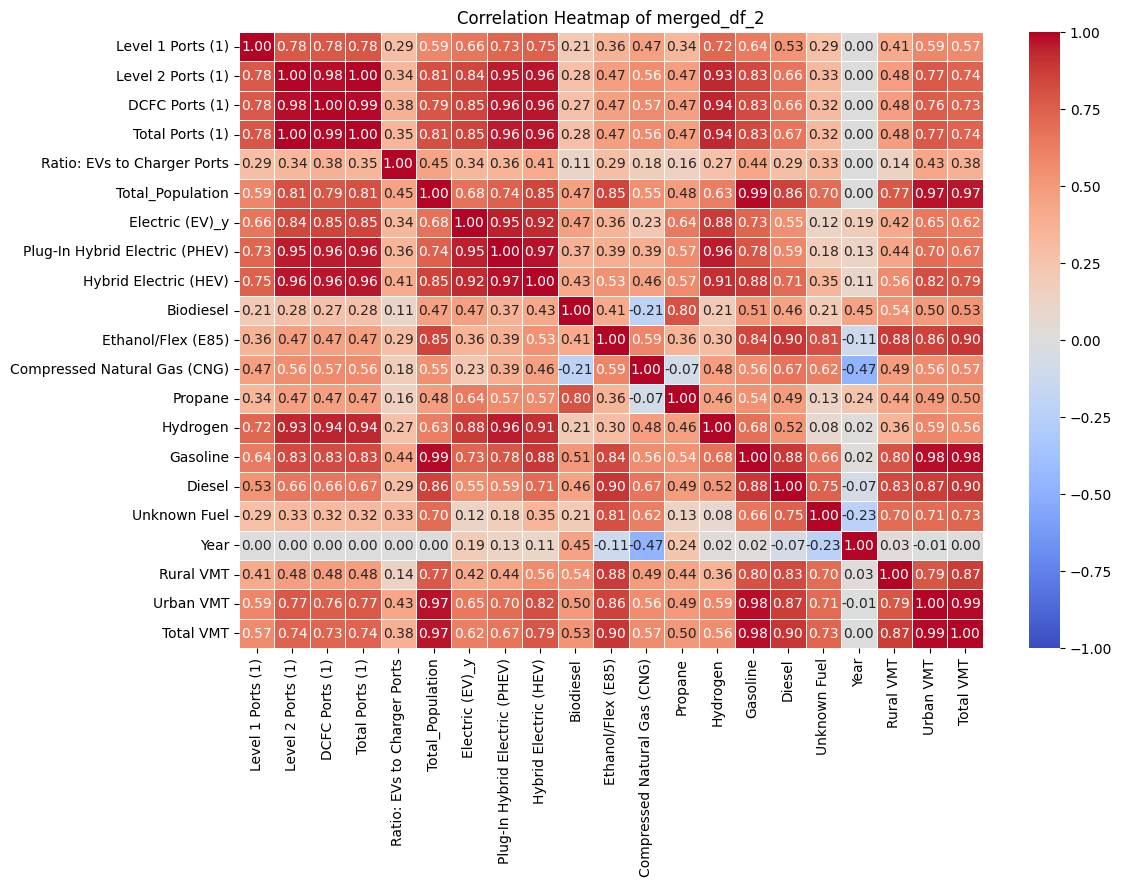

In [28]:
# Selecting only numeric columns for the heatmap
numeric_cols = merged_df_2.select_dtypes(include=['number'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of merged_df_2")
plt.show()

In [29]:
# Dropping the specified columns
columns_to_drop = [
    "Avg_AGI"
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

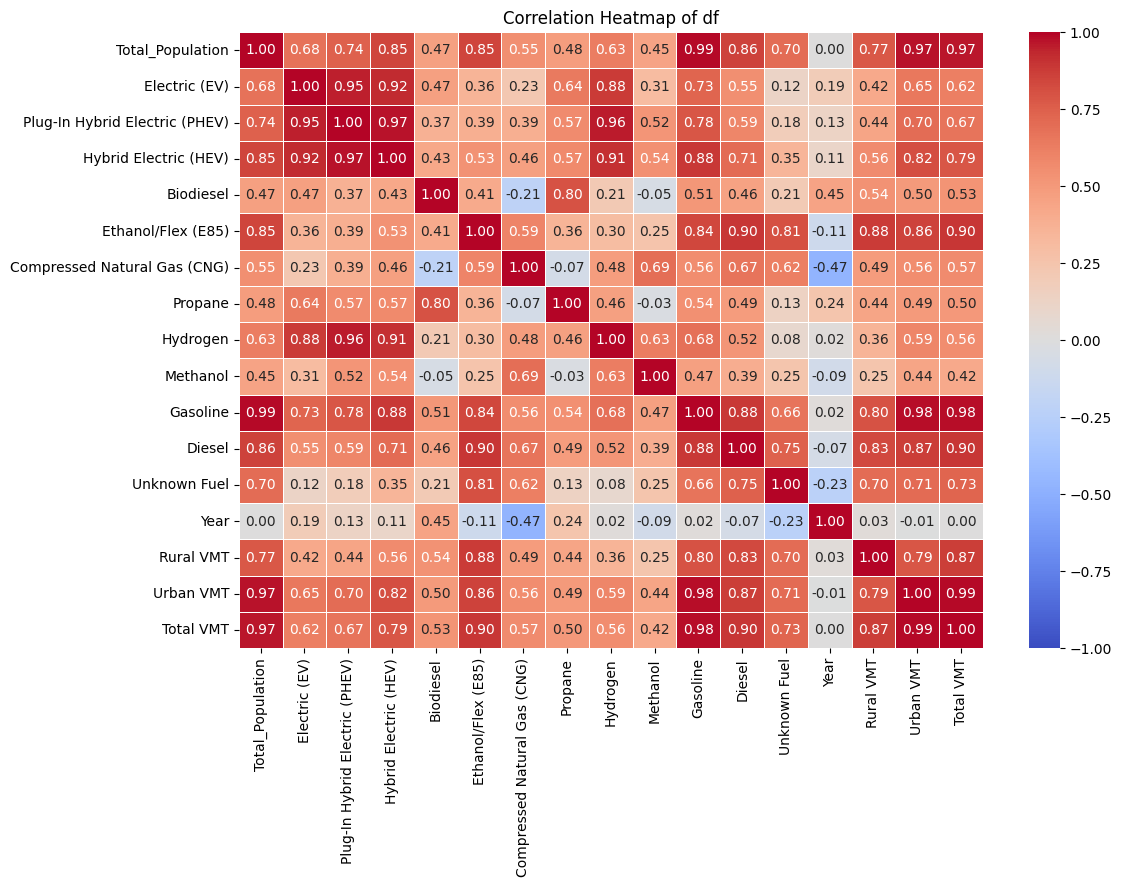

In [30]:
# Selecting only numeric columns for the heatmap
numeric_cols = df.select_dtypes(include=['number'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of df")
plt.show()

In [31]:
merged_df_2.head()

,State,Level 1 Ports (1),Level 2 Ports (1),DCFC Ports (1),Total Ports (1),Ratio: EVs to Charger Ports,STATE,Total_Population,Electric (EV)_y,Plug-In Hybrid Electric (PHEV),...,Compressed Natural Gas (CNG),Propane,Hydrogen,Gasoline,Diesel,Unknown Fuel,Year,Rural VMT,Urban VMT,Total VMT
0,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,1300,1500,...,17000,0,0,3733700,135900,46000,2018,28788.271994,42378.934760,71167.206754
1,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,2000,1800,...,15900,0,0,3806700,144900,44300,2019,29011.352422,42723.275388,71734.627811
2,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,2900,2100,...,15100,0,0,3863500,154100,41600,2020,27813.551320,40107.945520,67921.496840
3,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,4700,3300,...,500,100,0,4051000,123500,32000,2021,29164.422320,42727.609040,71892.031360
4,Alabama,0.0,386,94,480,12.67,Alabama,47258650.0,13000,5800,...,100,100,0,4102200,127000,29000,2023,29230.000000,43058.000000,72289.000000


In [32]:
merged_df_2.columns

Index(['State', 'Level 1 Ports (1)', 'Level 2 Ports (1)', 'DCFC Ports (1)',
       'Total Ports (1)', 'Ratio: EVs to Charger Ports', 'STATE',
       'Total_Population', 'Electric (EV)_y', 'Plug-In Hybrid Electric (PHEV)',
       'Hybrid Electric (HEV)', 'Biodiesel', 'Ethanol/Flex (E85)',
       'Compressed Natural Gas (CNG)', 'Propane', 'Hydrogen', 'Gasoline',
       'Diesel', 'Unknown Fuel', 'Year', 'Rural VMT', 'Urban VMT',
       'Total VMT'],
      dtype='object')

In [33]:
# Columns to normalize
cols_to_normalize = [
    'Level 1 Ports (1)', 'Level 2 Ports (1)', 'DCFC Ports (1)', 'Total Ports (1)',
    'Electric (EV)_y', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)',
    'Biodiesel', 'Ethanol/Flex (E85)', 'Compressed Natural Gas (CNG)',
    'Propane', 'Hydrogen', 'Gasoline', 'Diesel', 'Unknown Fuel',
    'Rural VMT', 'Urban VMT', 'Total VMT'
]

# Normalize by population and store in new DataFrame
normalized_df = merged_df_2[['State', 'Year', 'Total_Population']].copy()
for col in cols_to_normalize:
    normalized_col = f'{col} per capita'
    normalized_df[normalized_col] = merged_df_2[col] / merged_df_2['Total_Population']

In [34]:
normalized_df.head()

,State,Year,Total_Population,Level 1 Ports (1) per capita,Level 2 Ports (1) per capita,DCFC Ports (1) per capita,Total Ports (1) per capita,Electric (EV)_y per capita,Plug-In Hybrid Electric (PHEV) per capita,Hybrid Electric (HEV) per capita,...,Ethanol/Flex (E85) per capita,Compressed Natural Gas (CNG) per capita,Propane per capita,Hydrogen per capita,Gasoline per capita,Diesel per capita,Unknown Fuel per capita,Rural VMT per capita,Urban VMT per capita,Total VMT per capita
0,Alabama,2018,47258650.0,0.0,0.000008,0.000002,0.00001,0.000028,0.000032,0.000673,...,0.010781,0.000360,0.000000,0.0,0.079006,0.002876,0.000973,0.000609,0.000897,0.001506
1,Alabama,2019,47258650.0,0.0,0.000008,0.000002,0.00001,0.000042,0.000038,0.000713,...,0.011509,0.000336,0.000000,0.0,0.080550,0.003066,0.000937,0.000614,0.000904,0.001518
2,Alabama,2020,47258650.0,0.0,0.000008,0.000002,0.00001,0.000061,0.000044,0.000768,...,0.012010,0.000320,0.000000,0.0,0.081752,0.003261,0.000880,0.000589,0.000849,0.001437
3,Alabama,2021,47258650.0,0.0,0.000008,0.000002,0.00001,0.000099,0.000070,0.000899,...,0.009511,0.000011,0.000002,0.0,0.085720,0.002613,0.000677,0.000617,0.000904,0.001521
4,Alabama,2023,47258650.0,0.0,0.000008,0.000002,0.00001,0.000275,0.000123,0.001339,...,0.009336,0.000002,0.000002,0.0,0.086803,0.002687,0.000614,0.000619,0.000911,0.001530


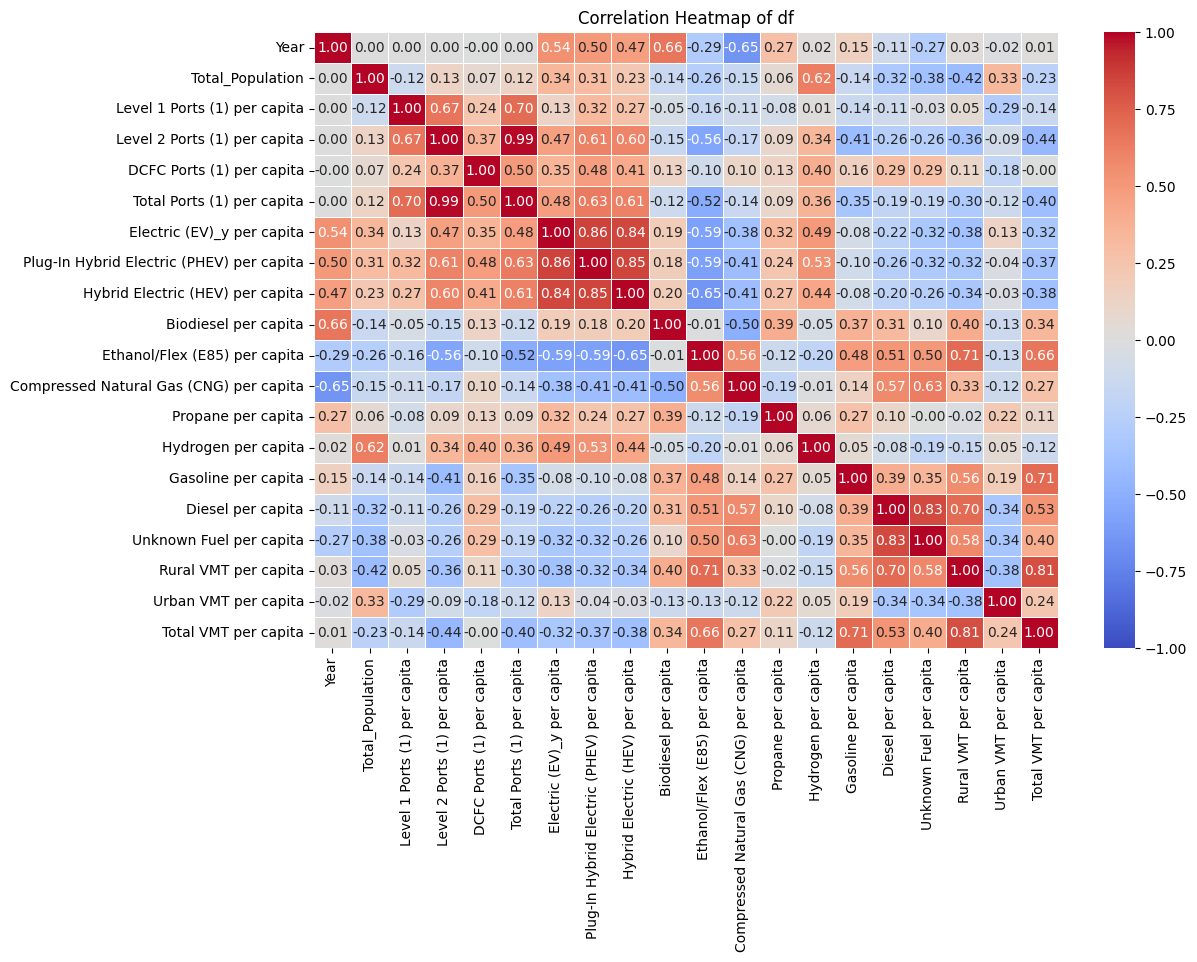

In [35]:
# Selecting only numeric columns for the heatmap
numeric_cols = normalized_df.select_dtypes(include=['number'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of df")
plt.show()